In [ ]:
!pip install tensorflow-datasets


In [ ]:
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.utils import to_categorical

# Load EMNIST 'byclass' split
ds_train, ds_test = tfds.load('emnist/byclass',
                              split=['train', 'test'],
                              batch_size=-1,
                              as_supervised=True)

# Convert to NumPy arrays
X_train, y_train = tfds.as_numpy(ds_train)
X_test, y_test = tfds.as_numpy(ds_test)

# Reshape and normalize
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Confirm shapes
print("Train images:", X_train.shape)
print("Train labels:", y_train_cat.shape)
print("Test images:", X_test.shape)
print("Test labels:", y_test_cat.shape)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/incomplete.6U6SIZ_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/incomplete.6U6SIZ_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/byclass/3.1.0. Subsequent calls will reuse this data.
Train images: (697932, 28, 28, 1)
Train labels: (697932, 62)
Test images: (116323, 28, 28, 1)
Test labels: (116323, 62)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')  # num_classes = 62
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [15]:
# Train the model (you can increase epochs for better accuracy)
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=5,         # You can increase to 10+ for better results
    batch_size=128,
    verbose=1
)


Epoch 1/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 565s 103ms/step - accuracy: 0.7080 - loss: 1.0194 - val_accuracy: 0.8506 - val_loss: 0.4207
Epoch 2/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 611s 101ms/step - accuracy: 0.8272 - loss: 0.5112 - val_accuracy: 0.8554 - val_loss: 0.3973
Epoch 3/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 556s 100ms/step - accuracy: 0.8383 - loss: 0.4694 - val_accuracy: 0.8592 - val_loss: 0.3820
Epoch 4/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 559s 100ms/step - accuracy: 0.8430 - loss: 0.4505 - val_accuracy: 0.8619 - val_loss: 0.3748
Epoch 5/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 582s 103ms/step - accuracy: 0.8472 - loss: 0.4355 - val_accuracy: 0.8641 - val_loss: 0.3690


In [16]:
# Save the trained model
model.save("symbol_cnn_model.h5")


In [17]:
# Optional: Download the model from Colab to your PC
from google.colab import files
files.download("symbol_cnn_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Predicted class index: 7


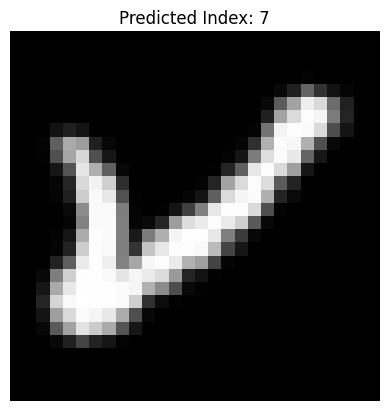

In [18]:
import matplotlib.pyplot as plt
index = np.random.randint(0, len(X_test))
sample = X_test[index].reshape(1, 28, 28, 1)

prediction = model.predict(sample)
predicted_class = np.argmax(prediction)

print("Predicted class index:", predicted_class)
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Index: {predicted_class}")
plt.axis('off')
plt.show()
